Support Vector Machine
====================

Basic Steps
----------

In [4]:
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_blobs()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
clf = SVC()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

accuracy = accuracy_score(pred, y_test)
print(accuracy)

1.0


SVC Parameters 
----------

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [8]:
iris = load_iris()
X = iris.data[:, :2]  # 4열 중 2열만 사용
y = iris.target

Kernel
-------

In [39]:
svc = SVC(kernel = 'linear', C = 1, gamma = 'auto').fit(X, y)
svc2 = SVC(kernel = 'rbf', C = 1, gamma = 'auto').fit(X, y)

In [40]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min) / 100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

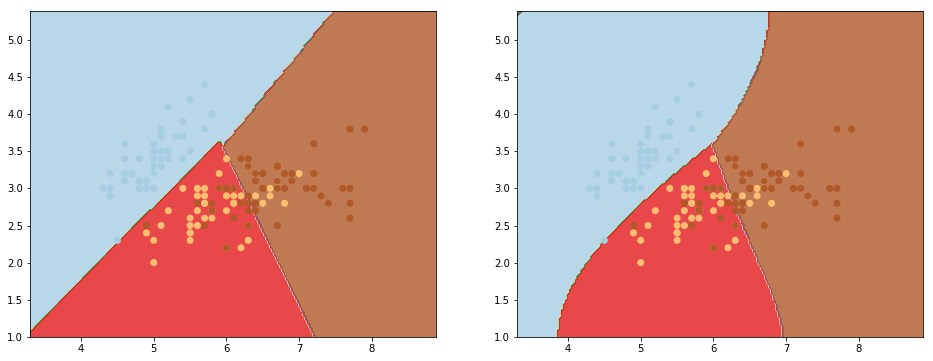

In [72]:
# c_ : 두 개의 1차원 배열을 칼럼으로 세로로 붙여서 2차원 배열 만들기
# ravel : 순서대로 정렬
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])  
Z = Z.reshape(xx.shape)
Z2 = svc2.predict(np.c_[xx.ravel(), yy.ravel()])
Z2 = Z2.reshape(xx.shape)

fig, ax = plt.subplots(1, 2, figsize = (16, 6))
ax[0].contourf(xx, yy, Z, cmap = plt.cm.Paired, alpha = 0.8)
ax[0].scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Paired)

ax[1].contourf(xx, yy, Z2, cmap = plt.cm.Paired, alpha = 0.8)
ax[1].scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Paired)

plt.show()

Gamma
-----

In [59]:
svc_g10 = SVC(kernel = 'rbf', C = 1, gamma = 10).fit(X, y)
svc_g100 = SVC(kernel = 'rbf', C = 1, gamma = 100).fit(X, y)

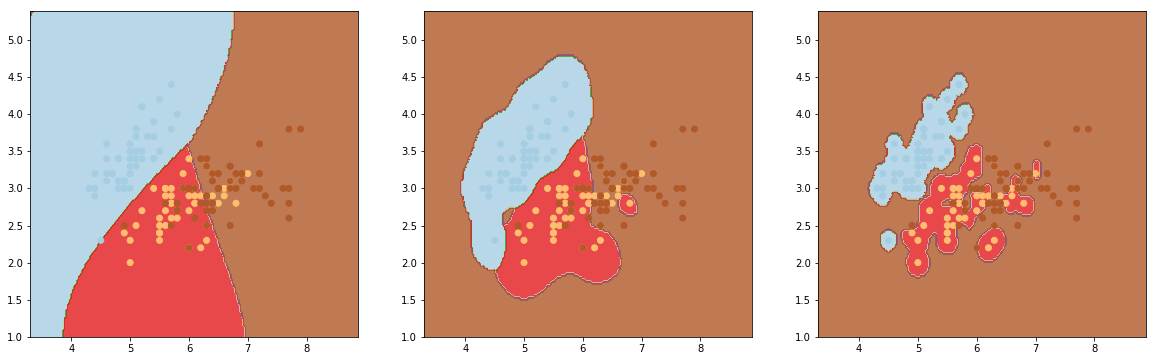

In [65]:
Z_g10 = svc_g10.predict(np.c_[xx.ravel(), yy.ravel()])
Z_g10 = Z_g10.reshape(xx.shape)
Z_g100 = svc_g100.predict(np.c_[xx.ravel(), yy.ravel()])
Z_g100 = Z_g100.reshape(xx.shape)

fig, ax = plt.subplots(1, 3, figsize = (20, 6))
ax[0].contourf(xx, yy, Z2, cmap = plt.cm.Paired, alpha = 0.8)
ax[0].scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Paired)

ax[1].contourf(xx, yy, Z_g10, cmap = plt.cm.Paired, alpha = 0.8)
ax[1].scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Paired)

ax[2].contourf(xx, yy, Z_g100, cmap = plt.cm.Paired, alpha = 0.8)
ax[2].scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Paired)

plt.xlim(xx.min(), xx.max())
plt.show()

C
--

In [63]:
svc_c10 = SVC(kernel = 'rbf', C = 100, gamma = 'auto').fit(X, y)
svc_c100 = SVC(kernel = 'rbf', C = 1000, gamma = 'auto').fit(X, y)

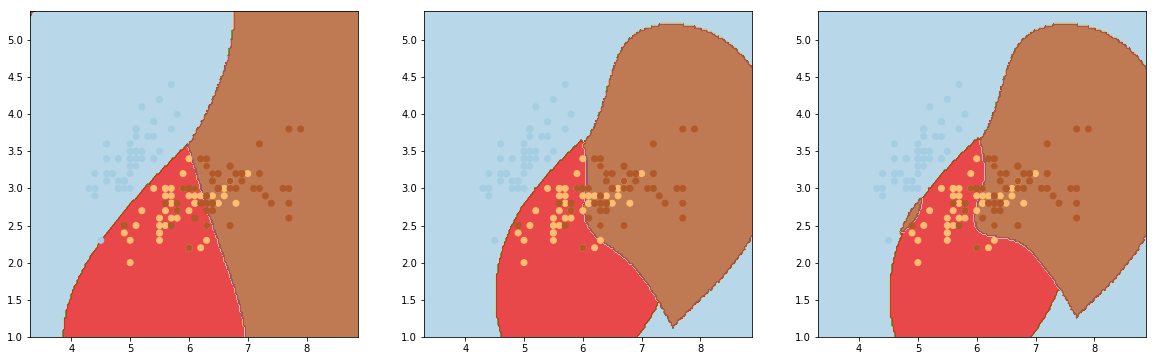

In [66]:
Z_c10 = svc_c10.predict(np.c_[xx.ravel(), yy.ravel()])
Z_c10 = Z_c10.reshape(xx.shape)
Z_c100 = svc_c100.predict(np.c_[xx.ravel(), yy.ravel()])
Z_c100 = Z_c100.reshape(xx.shape)

fig, ax = plt.subplots(1, 3, figsize = (20, 6))
ax[0].contourf(xx, yy, Z2, cmap = plt.cm.Paired, alpha = 0.8)
ax[0].scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Paired)

ax[1].contourf(xx, yy, Z_c10, cmap = plt.cm.Paired, alpha = 0.8)
ax[1].scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Paired)

ax[2].contourf(xx, yy, Z_c100, cmap = plt.cm.Paired, alpha = 0.8)
ax[2].scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Paired)

plt.xlim(xx.min(), xx.max())
plt.show()